tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96], shape=(50,), dtype=int32)


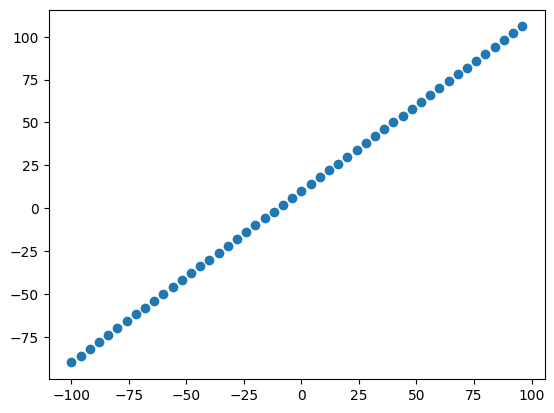

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

X=tf.range(-100,100,4)
print(X)
y=X+10

plt.scatter(X,y)


In [2]:
# split the data into train and test set
X_train=X[:40] #first 40 are training samples(80% of the data)
y_train=y[:40]

X_test=X[40:] #last 10 are testing samples(20% of the data)
y_test=y[40:]

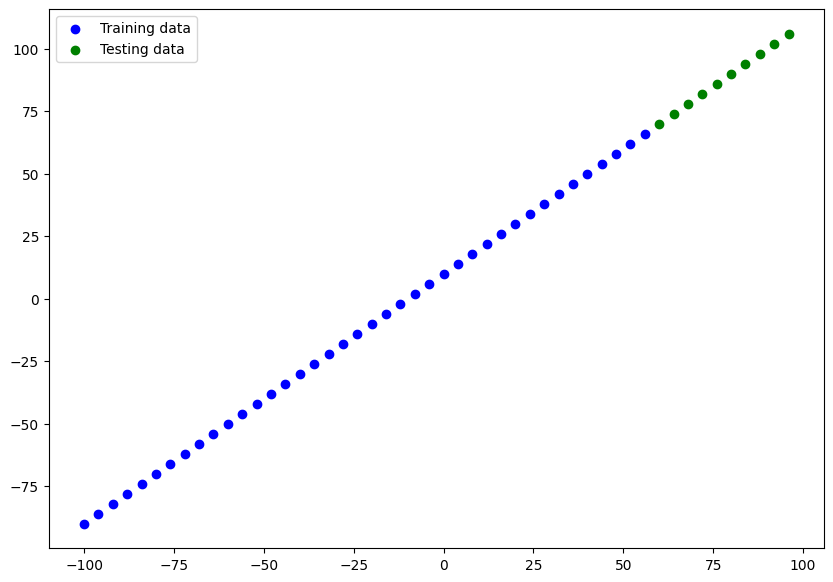

In [3]:
plt.figure(figsize=(10,7))
#plot the training data into blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#plot the testing data into green
plt.scatter(X_test,y_test,c="g",label="Testing data")
# show a legend
plt.legend()

In [4]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],activation=None),
])

# 2.compile model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)
model.summary()

c:\Users\ayush\OneDrive\Documents\Personal projects\MachineLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 105.1305 - mae: 105.1305
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.6536 - mae: 99.6536 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97.3510 - mae: 97.3510 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.6704 - mae: 99.6704   
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.2185 - mae: 99.2185   
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.5608 - mae: 99.5608   
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.7428 - mae: 93.7428 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96.3878 - mae: 96.3878 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 94.8852 - mae: 94.8852
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91.6814 - mae: 91.6814 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.7573 - mae: 91.7573 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.0799 - mae: 89.0799 
Epoch 13/100
2/2 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [5]:
y_preds = model.predict(X_test)
y_preds,y_preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


(array([[30.782356],
        [32.903522],
        [35.024693],
        [37.14586 ],
        [39.26703 ],
        [41.388195],
        [43.509365],
        [45.630535],
        [47.7517  ],
        [49.87287 ]], dtype=float32),
 (10, 1))

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

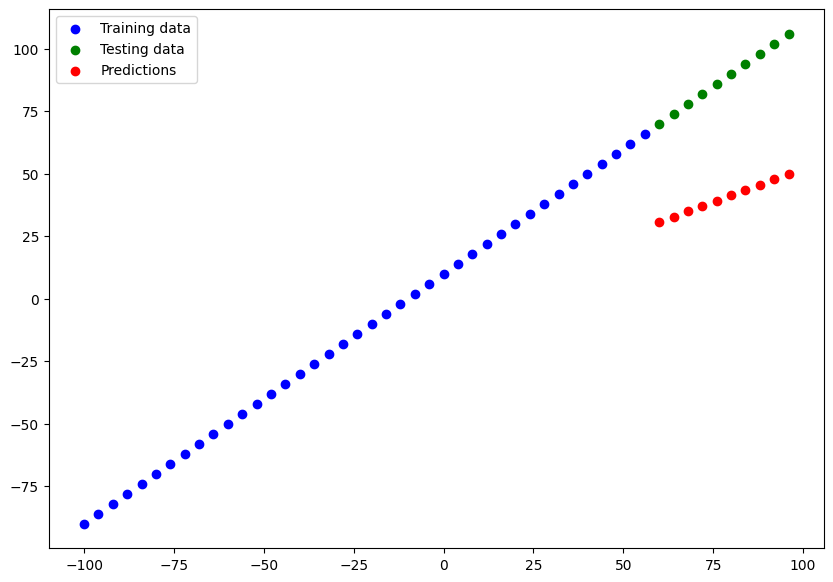

In [9]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)